# SPRINT N°4
* Fecha de inicio: 16/12/2024
* Fecha de presentación: 23/12/2024

## DATA CLEANING

### LIBRERÍAS

In [1]:
import pymysql
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

#### Para exportar la tabla de MySQL a un csv, he realizado la consulta completa de la tabla con 
#### SELECT * FROM BANK_marketing161224.
#### Después he Hecho la exportación de la consulta desde el menú Query.

In [2]:
S3_df_BANK_marketing = pd.read_csv('S3_df_BANK_marketing.csv')
S3_df_BANK_marketing
#df_BANK_marketing091224

,id,age,job,marital,education,is_in_default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,balance_normalizado,estado_balance
0,1,59.0,admin.,married,secondary,0.0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1,0.251390,Saldo Alto
1,2,59.0,admin.,married,secondary,0.0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1,0.251390,Saldo Alto
2,3,56.0,admin.,married,secondary,0.0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1,-0.446981,Saldo Bajo
3,4,41.0,technician,married,secondary,0.0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1,-0.074698,Saldo Medio Alto
4,5,55.0,services,married,secondary,0.0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1,0.291810,Saldo Alto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26174,26384,60.0,retired,married,primary,0.0,71,0,0,cellular,10,jul,121,3,-1,0,unknown,0,-0.439079,Saldo Bajo
26175,26388,47.0,blue-collar,married,secondary,0.0,802,1,1,cellular,12,may,289,2,-1,0,unknown,1,-0.216925,Saldo Medio Alto
26176,26389,40.0,admin.,married,secondary,0.0,1327,1,1,unknown,26,may,76,2,-1,0,unknown,0,-0.057376,Saldo Medio Alto
26177,26386,58.0,unemployed,single,tertiary,0.0,2094,0,0,cellular,1,jun,161,2,-1,0,unknown,0,0.175718,Saldo Alto


In [3]:
df_BANK_marketing161224 = pd.read_csv('S4_BANK_marketing161224_bruto.csv')
df_BANK_marketing161224

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,2,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
2,3,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
3,4,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
4,5,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39183,45763,41.0,management,divorced,tertiary,no,107,yes,no,cellular,17,jul,122,17,-1,0,unknown,no
39184,45764,57.0,management,married,tertiary,no,350,no,no,telephone,4,may,87,3,-1,0,unknown,no
39185,45765,84.0,retired,married,secondary,no,81204,no,no,telephone,28,dec,679,1,313,2,other,yes
39186,45766,29.0,blue-collar,married,primary,no,544,no,yes,cellular,21,jul,121,4,-1,0,unknown,no


#### SPRINT Nº4

##### REGISTROS NUEVOS

In [4]:
diff_count = len(df_BANK_marketing161224) -  len(S3_df_BANK_marketing)
print(f"Registros nuevos: {diff_count}")

Registros nuevos: 13009


### RENOMBRO DATRAFAME PARA APROVECHAR EL SCRIPT

In [5]:
S4_df_BANK_marketing = df_BANK_marketing161224
S4_df_BANK_marketing

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,2,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
2,3,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
3,4,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
4,5,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39183,45763,41.0,management,divorced,tertiary,no,107,yes,no,cellular,17,jul,122,17,-1,0,unknown,no
39184,45764,57.0,management,married,tertiary,no,350,no,no,telephone,4,may,87,3,-1,0,unknown,no
39185,45765,84.0,retired,married,secondary,no,81204,no,no,telephone,28,dec,679,1,313,2,other,yes
39186,45766,29.0,blue-collar,married,primary,no,544,no,yes,cellular,21,jul,121,4,-1,0,unknown,no


### RENOMBRAR COLUMNAS

#### deafult -> is_in_deafult

In [6]:
S4_df_BANK_marketing.rename(columns={'default': 'is_in_default'}, inplace=True)
S4_df_BANK_marketing

,id,age,job,marital,education,is_in_default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,2,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
2,3,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
3,4,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
4,5,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39183,45763,41.0,management,divorced,tertiary,no,107,yes,no,cellular,17,jul,122,17,-1,0,unknown,no
39184,45764,57.0,management,married,tertiary,no,350,no,no,telephone,4,may,87,3,-1,0,unknown,no
39185,45765,84.0,retired,married,secondary,no,81204,no,no,telephone,28,dec,679,1,313,2,other,yes
39186,45766,29.0,blue-collar,married,primary,no,544,no,yes,cellular,21,jul,121,4,-1,0,unknown,no


### RENOMBRAR REGISTROS

#### yes = 1, no = 0

In [7]:
S4_df_BANK_marketing = S4_df_BANK_marketing.replace({'yes': 1, 'no': 0})
S4_df_BANK_marketing

C:\Users\34622\AppData\Local\Temp\ipykernel_11184\1517126992.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  S4_df_BANK_marketing = S4_df_BANK_marketing.replace({'yes': 1, 'no': 0})


,id,age,job,marital,education,is_in_default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1,59.0,admin.,married,secondary,0.0,2343,1.0,0,unknown,5,may,1042,1,-1,0,unknown,1
1,2,59.0,admin.,married,secondary,0.0,2343,1.0,0,unknown,5,may,1042,1,-1,0,unknown,1
2,3,56.0,admin.,married,secondary,0.0,45,0.0,0,unknown,5,may,1467,1,-1,0,unknown,1
3,4,41.0,technician,married,secondary,0.0,1270,1.0,0,unknown,5,may,1389,1,-1,0,unknown,1
4,5,55.0,services,married,secondary,0.0,2476,1.0,0,unknown,5,may,579,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39183,45763,41.0,management,divorced,tertiary,0.0,107,1.0,0,cellular,17,jul,122,17,-1,0,unknown,0
39184,45764,57.0,management,married,tertiary,0.0,350,0.0,0,telephone,4,may,87,3,-1,0,unknown,0
39185,45765,84.0,retired,married,secondary,0.0,81204,0.0,0,telephone,28,dec,679,1,313,2,other,1
39186,45766,29.0,blue-collar,married,primary,0.0,544,0.0,1,cellular,21,jul,121,4,-1,0,unknown,0


In [8]:
S4_df_BANK_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39188 entries, 0 to 39187
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             39188 non-null  int64  
 1   age            39158 non-null  float64
 2   job            39188 non-null  object 
 3   marital        39168 non-null  object 
 4   education      39163 non-null  object 
 5   is_in_default  39157 non-null  float64
 6   balance        39188 non-null  int64  
 7   housing        39071 non-null  float64
 8   loan           39188 non-null  int64  
 9   contact        39188 non-null  object 
 10  day            39188 non-null  int64  
 11  month          39188 non-null  object 
 12  duration       39188 non-null  int64  
 13  campaign       39188 non-null  int64  
 14  pdays          39188 non-null  int64  
 15  previous       39188 non-null  int64  
 16  poutcome       39188 non-null  object 
 17  deposit        39188 non-null  int64  
dtypes: flo

In [9]:
S4_df_BANK_marketing

,id,age,job,marital,education,is_in_default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1,59.0,admin.,married,secondary,0.0,2343,1.0,0,unknown,5,may,1042,1,-1,0,unknown,1
1,2,59.0,admin.,married,secondary,0.0,2343,1.0,0,unknown,5,may,1042,1,-1,0,unknown,1
2,3,56.0,admin.,married,secondary,0.0,45,0.0,0,unknown,5,may,1467,1,-1,0,unknown,1
3,4,41.0,technician,married,secondary,0.0,1270,1.0,0,unknown,5,may,1389,1,-1,0,unknown,1
4,5,55.0,services,married,secondary,0.0,2476,1.0,0,unknown,5,may,579,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39183,45763,41.0,management,divorced,tertiary,0.0,107,1.0,0,cellular,17,jul,122,17,-1,0,unknown,0
39184,45764,57.0,management,married,tertiary,0.0,350,0.0,0,telephone,4,may,87,3,-1,0,unknown,0
39185,45765,84.0,retired,married,secondary,0.0,81204,0.0,0,telephone,28,dec,679,1,313,2,other,1
39186,45766,29.0,blue-collar,married,primary,0.0,544,0.0,1,cellular,21,jul,121,4,-1,0,unknown,0


### RESOLVER ESPACIOS EN BLANCO

In [10]:
S4_df_BANK_marketing = S4_df_BANK_marketing.replace({' ':''})
S4_df_BANK_marketing

,id,age,job,marital,education,is_in_default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1,59.0,admin.,married,secondary,0.0,2343,1.0,0,unknown,5,may,1042,1,-1,0,unknown,1
1,2,59.0,admin.,married,secondary,0.0,2343,1.0,0,unknown,5,may,1042,1,-1,0,unknown,1
2,3,56.0,admin.,married,secondary,0.0,45,0.0,0,unknown,5,may,1467,1,-1,0,unknown,1
3,4,41.0,technician,married,secondary,0.0,1270,1.0,0,unknown,5,may,1389,1,-1,0,unknown,1
4,5,55.0,services,married,secondary,0.0,2476,1.0,0,unknown,5,may,579,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39183,45763,41.0,management,divorced,tertiary,0.0,107,1.0,0,cellular,17,jul,122,17,-1,0,unknown,0
39184,45764,57.0,management,married,tertiary,0.0,350,0.0,0,telephone,4,may,87,3,-1,0,unknown,0
39185,45765,84.0,retired,married,secondary,0.0,81204,0.0,0,telephone,28,dec,679,1,313,2,other,1
39186,45766,29.0,blue-collar,married,primary,0.0,544,0.0,1,cellular,21,jul,121,4,-1,0,unknown,0


### DUPLICADOS 

In [11]:
S4_df_BANK_marketing.duplicated().sum()

np.int64(0)

###### NO hay duplicados en el dataset

### NULOS

#### IDENTIFICACIÓN DE NULOS

In [12]:
S4_df_BANK_marketing.isnull().sum()

id                 0
age               30
job                0
marital           20
education         25
is_in_default     31
balance            0
housing          117
loan               0
contact            0
day                0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
deposit            0
dtype: int64

In [13]:
S4_df_BANK_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39188 entries, 0 to 39187
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             39188 non-null  int64  
 1   age            39158 non-null  float64
 2   job            39188 non-null  object 
 3   marital        39168 non-null  object 
 4   education      39163 non-null  object 
 5   is_in_default  39157 non-null  float64
 6   balance        39188 non-null  int64  
 7   housing        39071 non-null  float64
 8   loan           39188 non-null  int64  
 9   contact        39188 non-null  object 
 10  day            39188 non-null  int64  
 11  month          39188 non-null  object 
 12  duration       39188 non-null  int64  
 13  campaign       39188 non-null  int64  
 14  pdays          39188 non-null  int64  
 15  previous       39188 non-null  int64  
 16  poutcome       39188 non-null  object 
 17  deposit        39188 non-null  int64  
dtypes: flo

#### RESOLUCIÓN DE NULOS

##### MARITAL
  * Propuesta: Usar la moda con respecto a "age"

In [14]:
nulos_marital = S4_df_BANK_marketing[S4_df_BANK_marketing['marital'].isna()].sort_values('age',ascending=True)
nulos_marital

,id,age,job,marital,education,is_in_default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
15513,15514,30.0,blue-collar,NaN,primary,0.0,35,1.0,0,cellular,11,jul,366,2,-1,0,unknown,0
9273,9274,30.0,blue-collar,NaN,primary,0.0,35,1.0,0,cellular,11,jul,366,2,-1,0,unknown,0
33584,40164,30.0,blue-collar,NaN,primary,0.0,35,1.0,0,cellular,11,jul,366,2,-1,0,unknown,0
4855,4856,34.0,management,NaN,tertiary,0.0,5,0.0,0,cellular,18,aug,370,2,-1,0,unknown,1
32870,39450,34.0,management,NaN,tertiary,0.0,5,0.0,0,cellular,18,aug,370,2,-1,0,unknown,1
25692,25693,34.0,management,NaN,tertiary,0.0,5,0.0,0,cellular,18,aug,370,2,-1,0,unknown,1
34058,40638,34.0,management,NaN,tertiary,0.0,5,0.0,0,cellular,18,aug,370,2,-1,0,unknown,1
13124,13125,34.0,management,NaN,tertiary,0.0,5,0.0,0,cellular,18,aug,370,2,-1,0,unknown,1
24556,24557,53.0,management,NaN,secondary,0.0,1004,0.0,1,telephone,22,dec,119,1,-1,0,unknown,1
36695,43275,53.0,management,NaN,secondary,0.0,1004,0.0,1,telephone,22,dec,119,1,-1,0,unknown,1


In [15]:
#DF con los 'ages' en cuestión para descubrir su marital
valores_filtrados = [30, 34, 53, 60, 68] 
df_BANK_marketing_age = S4_df_BANK_marketing[S4_df_BANK_marketing['age'].isin(valores_filtrados)]

In [16]:
df_BANK_marketing_age.groupby(['age','marital']).agg({'marital': 'count'})

marital
age  marital          
30.0 divorced       79
     married       532
     single       1007
34.0 divorced      104
     married       952
     single        561
53.0 divorced      122
     married       517
     single         56
60.0 divorced      126
     married       463
     single         16
68.0 divorced       14
     married        44
     single         13

###### RESULTADO MARITAL

age | marital:
* 30 -> single
* 34 -> married
* 53 -> married
* 60 -> married
* 68 -> married

In [17]:
#Función para asignar el valor a 'marital'
def completar_marital(row):
    if pd.isna(row['marital']):  #Si 'marital' es nulo
        if row['age'] == 30:
            return 'single'
        elif row['age'] == 34:
            return 'married'
        elif row['age'] == 53:
            return 'married'
        elif row['age'] == 60:
            return 'married'
        elif row['age'] == 68:
            return 'married'
    return row['marital']  #Si 'marital' no es nulo, lo dejamos igual

#Ejecuto la función con .apply()
S4_df_BANK_marketing['marital'] = S4_df_BANK_marketing.apply(completar_marital, axis=1)

In [18]:
#Confirmo los cambios con los id afectados
ids_filtrados_marital = nulos_marital['id']

df_filtrado_marital = S4_df_BANK_marketing[S4_df_BANK_marketing['id'].isin(ids_filtrados_marital)].sort_values('age',ascending=True)

df_filtrado_marital

,id,age,job,marital,education,is_in_default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
15513,15514,30.0,blue-collar,single,primary,0.0,35,1.0,0,cellular,11,jul,366,2,-1,0,unknown,0
9273,9274,30.0,blue-collar,single,primary,0.0,35,1.0,0,cellular,11,jul,366,2,-1,0,unknown,0
33584,40164,30.0,blue-collar,single,primary,0.0,35,1.0,0,cellular,11,jul,366,2,-1,0,unknown,0
4855,4856,34.0,management,married,tertiary,0.0,5,0.0,0,cellular,18,aug,370,2,-1,0,unknown,1
32870,39450,34.0,management,married,tertiary,0.0,5,0.0,0,cellular,18,aug,370,2,-1,0,unknown,1
25692,25693,34.0,management,married,tertiary,0.0,5,0.0,0,cellular,18,aug,370,2,-1,0,unknown,1
34058,40638,34.0,management,married,tertiary,0.0,5,0.0,0,cellular,18,aug,370,2,-1,0,unknown,1
13124,13125,34.0,management,married,tertiary,0.0,5,0.0,0,cellular,18,aug,370,2,-1,0,unknown,1
24556,24557,53.0,management,married,secondary,0.0,1004,0.0,1,telephone,22,dec,119,1,-1,0,unknown,1
36695,43275,53.0,management,married,secondary,0.0,1004,0.0,1,telephone,22,dec,119,1,-1,0,unknown,1


##### AGE
  * Propuesta: Usar la media de los "marital"

In [19]:
nulos_age = S4_df_BANK_marketing[S4_df_BANK_marketing['age'].isna()]
nulos_age

,id,age,job,marital,education,is_in_default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
1182,1183,NaN,management,married,tertiary,0.0,309,1.0,0,cellular,5,feb,676,1,-1,0,unknown,1
1411,1412,NaN,blue-collar,married,primary,0.0,4979,0.0,0,telephone,6,apr,180,1,-1,0,unknown,1
4020,4021,NaN,services,single,secondary,0.0,1934,0.0,0,cellular,29,sep,271,1,-1,0,unknown,1
5681,5682,NaN,technician,single,tertiary,0.0,720,0.0,0,cellular,12,aug,234,4,-1,0,unknown,0
6764,6765,NaN,technician,single,tertiary,0.0,686,1.0,0,unknown,30,may,98,2,-1,0,unknown,0
8420,8421,NaN,blue-collar,married,secondary,0.0,1782,1.0,0,unknown,19,jun,549,1,-1,0,unknown,0
9471,9472,NaN,management,married,tertiary,0.0,552,0.0,0,cellular,28,jul,761,8,-1,0,unknown,0
9553,9554,NaN,admin.,married,secondary,0.0,1648,1.0,0,cellular,19,nov,172,3,-1,0,unknown,0
9752,9753,NaN,services,married,primary,0.0,2567,1.0,0,cellular,14,may,109,1,360,2,failure,0
10679,10680,NaN,technician,divorced,tertiary,0.0,0,1.0,0,cellular,2,jun,72,1,-1,0,unknown,0


###### RESULTADO AGE

In [20]:
# Calcular la media de 'age' para cada categoría en 'marital'
media_por_marital = S4_df_BANK_marketing.groupby('marital')['age'].mean().round(0)
media_por_marital

marital
divorced    47.0
married     45.0
single      33.0
Name: age, dtype: float64

In [21]:
#Función para asignar el valor a 'age'
def completar_age(row):
    if pd.isna(row['age']):  #Si 'age' es nulo
        if row['marital'] == 'divorced':
            return 47
        elif row['marital'] == 'married':
            return 45
        elif row['marital'] == 'single':
            return 33
    return row['age']  #Si 'age' no es nulo, lo dejamos igual

#Ejecuto la función con .apply()
S4_df_BANK_marketing['age'] = S4_df_BANK_marketing.apply(completar_age, axis=1)

In [22]:
#Confirmo los cambios con los id afectados
ids_filtrados_marital = nulos_age['id']

df_filtrado_marital = S4_df_BANK_marketing[S4_df_BANK_marketing['id'].isin(ids_filtrados_marital)].sort_values('id',ascending=True)

df_filtrado_marital

,id,age,job,marital,education,is_in_default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
1182,1183,45.0,management,married,tertiary,0.0,309,1.0,0,cellular,5,feb,676,1,-1,0,unknown,1
1411,1412,45.0,blue-collar,married,primary,0.0,4979,0.0,0,telephone,6,apr,180,1,-1,0,unknown,1
4020,4021,33.0,services,single,secondary,0.0,1934,0.0,0,cellular,29,sep,271,1,-1,0,unknown,1
5681,5682,33.0,technician,single,tertiary,0.0,720,0.0,0,cellular,12,aug,234,4,-1,0,unknown,0
6764,6765,33.0,technician,single,tertiary,0.0,686,1.0,0,unknown,30,may,98,2,-1,0,unknown,0
8420,8421,45.0,blue-collar,married,secondary,0.0,1782,1.0,0,unknown,19,jun,549,1,-1,0,unknown,0
9471,9472,45.0,management,married,tertiary,0.0,552,0.0,0,cellular,28,jul,761,8,-1,0,unknown,0
9553,9554,45.0,admin.,married,secondary,0.0,1648,1.0,0,cellular,19,nov,172,3,-1,0,unknown,0
9752,9753,45.0,services,married,primary,0.0,2567,1.0,0,cellular,14,may,109,1,360,2,failure,0
10679,10680,47.0,technician,divorced,tertiary,0.0,0,1.0,0,cellular,2,jun,72,1,-1,0,unknown,0


##### EDUCATION
  *  Propuesta: Usar la moda con respecto a "job"

In [23]:
nulos_education = S4_df_BANK_marketing[S4_df_BANK_marketing['education'].isna()]
nulos_education 

,id,age,job,marital,education,is_in_default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
1301,1302,37.0,technician,married,NaN,0.0,549,0.0,0,cellular,2,mar,239,1,-1,0,unknown,1
2944,2945,24.0,student,single,NaN,0.0,382,0.0,0,cellular,13,nov,256,2,92,3,failure,1
4738,4739,37.0,management,single,NaN,0.0,102,1.0,0,cellular,6,may,445,1,258,2,failure,1
6820,6821,32.0,services,married,NaN,0.0,-344,0.0,1,cellular,4,feb,44,1,-1,0,unknown,0
7122,7123,57.0,entrepreneur,married,NaN,0.0,657,0.0,0,unknown,12,jun,344,1,-1,0,unknown,0
8593,8594,55.0,management,single,NaN,0.0,797,0.0,0,cellular,29,jul,24,2,-1,0,unknown,0
9407,9408,32.0,technician,single,NaN,0.0,696,0.0,1,cellular,13,aug,101,4,105,4,failure,0
13138,13139,32.0,technician,single,NaN,0.0,696,0.0,1,cellular,13,aug,101,4,105,4,failure,0
14807,14808,37.0,technician,married,NaN,0.0,549,0.0,0,cellular,2,mar,239,1,-1,0,unknown,1
14915,14916,24.0,student,single,NaN,0.0,382,0.0,0,cellular,13,nov,256,2,92,3,failure,1


In [24]:
#DF con los 'job' en cuestión para descubrir su education
valores_filtrados = ['technician', 'student', 'management', 'services', 'entrepreneur'] 
df_BANK_marketing_job = S4_df_BANK_marketing[S4_df_BANK_marketing['job'].isin(valores_filtrados)]

In [25]:
df_BANK_marketing_job.groupby(['job','education']).agg({'id': 'count'})

id
job          education      
entrepreneur primary     158
             secondary   505
             tertiary    429
             unknown      34
management   primary     203
             secondary   826
             tertiary   7663
             unknown     297
services     primary     305
             secondary  2630
             tertiary    175
             unknown     167
student      primary      76
             secondary   635
             tertiary    310
             unknown     220
technician   primary     153
             secondary  4230
             tertiary   1869
             unknown     183

###### RESULTADO EDUCATION

job | education:
* entrepreneur -> secondary
* management -> tertiary
* services -> secondary
* student -> secondary
* technician -> secondary

In [26]:
#Función para asignar el valor a 'education'
def completar_education(row):
    if pd.isna(row['education']):  #Si 'job' es nulo
        if row['job'] == 'entrepreneur':
            return 'secondary'
        elif row['job'] == 'management':
            return 'tertiary'
        elif row['job'] == 'services':
            return 'secondary'
        elif row['job'] == 'student':
            return 'secondary'
        elif row['job'] == 'technician':
            return 'secondary'        
    return row['education']  #Si 'education' no es nulo, lo dejamos igual

#Ejecuto la función con .apply()
S4_df_BANK_marketing['education'] = S4_df_BANK_marketing.apply(completar_education, axis=1)


In [27]:
#Confirmo los cambios con los id afectados
ids_filtrados_education = nulos_education['id']

ids_filtrados_education = S4_df_BANK_marketing[S4_df_BANK_marketing['id'].isin(ids_filtrados_education)].sort_values('id',ascending=True)

ids_filtrados_education

,id,age,job,marital,education,is_in_default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
1301,1302,37.0,technician,married,secondary,0.0,549,0.0,0,cellular,2,mar,239,1,-1,0,unknown,1
2944,2945,24.0,student,single,secondary,0.0,382,0.0,0,cellular,13,nov,256,2,92,3,failure,1
4738,4739,37.0,management,single,tertiary,0.0,102,1.0,0,cellular,6,may,445,1,258,2,failure,1
6820,6821,32.0,services,married,secondary,0.0,-344,0.0,1,cellular,4,feb,44,1,-1,0,unknown,0
7122,7123,57.0,entrepreneur,married,secondary,0.0,657,0.0,0,unknown,12,jun,344,1,-1,0,unknown,0
8593,8594,55.0,management,single,tertiary,0.0,797,0.0,0,cellular,29,jul,24,2,-1,0,unknown,0
9407,9408,32.0,technician,single,secondary,0.0,696,0.0,1,cellular,13,aug,101,4,105,4,failure,0
13138,13139,32.0,technician,single,secondary,0.0,696,0.0,1,cellular,13,aug,101,4,105,4,failure,0
14807,14808,37.0,technician,married,secondary,0.0,549,0.0,0,cellular,2,mar,239,1,-1,0,unknown,1
14915,14916,24.0,student,single,secondary,0.0,382,0.0,0,cellular,13,nov,256,2,92,3,failure,1


##### HOUSING 

In [28]:
nulos_housing = S4_df_BANK_marketing[S4_df_BANK_marketing['housing'].isna()].sort_values('id',ascending=True)
nulos_housing

,id,age,job,marital,education,is_in_default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
189,190,32.0,services,married,secondary,0.0,-34,NaN,0,unknown,30,may,1236,2,-1,0,unknown,1
312,313,39.0,blue-collar,married,primary,0.0,2303,NaN,0,unknown,17,jun,775,3,-1,0,unknown,1
1250,1251,47.0,entrepreneur,married,tertiary,0.0,0,NaN,0,cellular,16,feb,261,2,-1,0,unknown,1
1528,1529,38.0,management,married,tertiary,0.0,165,NaN,0,cellular,17,apr,526,1,260,2,other,1
1785,1786,29.0,management,single,tertiary,0.0,9407,NaN,0,cellular,4,may,267,6,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37217,43797,47.0,technician,married,secondary,0.0,1167,NaN,0,cellular,4,aug,505,1,96,6,success,1
37326,43906,43.0,admin.,married,secondary,0.0,1996,NaN,1,cellular,31,jul,34,3,-1,0,unknown,0
37940,44520,30.0,student,single,secondary,0.0,1681,NaN,0,cellular,23,mar,128,1,106,2,success,1
38670,45250,29.0,unemployed,single,tertiary,0.0,1311,NaN,0,cellular,28,aug,622,1,-1,0,unknown,1


Normalizamos la variable balance para poder trabajarla seguidamente en una prueba T

In [29]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import ttest_ind

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Normalizar la columna balance
S4_df_BANK_marketing['balance_normalizado'] = scaler.fit_transform(S4_df_BANK_marketing[['balance']])

# Comprobar los primeros valores para verificar la normalización
print(S4_df_BANK_marketing[['balance', 'balance_normalizado']].head())

   balance  balance_normalizado
0     2343             0.260495
1     2343             0.260495
2       45            -0.455442
3     1270            -0.073796
4     2476             0.301931


Realizamos la prueba T para comprobar la relación entre variables

In [30]:
# Dividir los datos según 'housing'
grupo_yes = S4_df_BANK_marketing[S4_df_BANK_marketing['housing'] == 1]['balance_normalizado']
grupo_no = S4_df_BANK_marketing[S4_df_BANK_marketing['housing'] == 0]['balance_normalizado']

# Realizar la prueba T
from scipy.stats import ttest_ind
stat, p_value = ttest_ind(grupo_yes, grupo_no, equal_var=False)


print(f"Estadístico T: {stat}")
print(f"P-valor: {p_value}")
if p_value < 0.05:
    print("Hay una diferencia significativa en los balances normalizados entre los grupos de housing.")
else:
    print("No hay evidencia de diferencias significativas entre los grupos de housing.")

Estadístico T: -15.579258179652465
P-valor: 1.520366080610181e-54
Hay una diferencia significativa en los balances normalizados entre los grupos de housing.


Vamos a realizar los quartiles de balance para distribuirlos por categroias

In [31]:
def quartiles(qua):
    # calculamos los rangos de los 3 quartiles
    q1 = qua.quantile(0.25)
    q2 = qua.quantile(0.50) 
    q3 = qua.quantile(0.75)

    iqr = q3 - q1 #calculamos el IQR interquartilic range

    # esto sirve para ver el quartil minimo y el quartil maximo
    min_q = q1 - 1.5*iqr
    max_q = q3 + 1.5*iqr
    
    return q1, q2, q3, min_q, max_q

q1, q2, q3, min_q, max_q = quartiles(S4_df_BANK_marketing['balance'])

print(f"Q1 (Primer cuartil): {q1}")
print(f"Q2 (Mediana): {q2}")
print(f"Q3 (Tercer cuartil): {q3}")
print(f"Mínimo (Outlier mínimo): {min_q}")
print(f"Máximo (Outlier máximo): {max_q}")

Q1 (Primer cuartil): 121.0
Q2 (Mediana): 549.0
Q3 (Tercer cuartil): 1693.0
Mínimo (Outlier mínimo): -2237.0
Máximo (Outlier máximo): 4051.0


In [32]:
def rango_balance(balance):
    if balance < min_q:
        return "Saldo Muy Bajo"
    elif balance < q1:
        return "Saldo Bajo"
    elif balance < q2:
        return "Saldo Medio"
    elif balance < q3:
        return "Saldo Medio Alto"
    elif balance <= max_q:  # Incluye el límite máximo
        return "Saldo Alto"
    else:  # Todo lo que sea mayor a max_q
        return "Saldo Muy Alto"

S4_df_BANK_marketing['estado_balance'] = S4_df_BANK_marketing['balance'].apply(rango_balance)
S4_df_BANK_marketing.head()

,id,age,job,marital,education,is_in_default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,balance_normalizado,estado_balance
0,1,59.0,admin.,married,secondary,0.0,2343,1.0,0,unknown,5,may,1042,1,-1,0,unknown,1,0.260495,Saldo Alto
1,2,59.0,admin.,married,secondary,0.0,2343,1.0,0,unknown,5,may,1042,1,-1,0,unknown,1,0.260495,Saldo Alto
2,3,56.0,admin.,married,secondary,0.0,45,0.0,0,unknown,5,may,1467,1,-1,0,unknown,1,-0.455442,Saldo Bajo
3,4,41.0,technician,married,secondary,0.0,1270,1.0,0,unknown,5,may,1389,1,-1,0,unknown,1,-0.073796,Saldo Medio Alto
4,5,55.0,services,married,secondary,0.0,2476,1.0,0,unknown,5,may,579,1,-1,0,unknown,1,0.301931,Saldo Alto


In [33]:
# Crear tabla resumen de frecuencias de 'housing' por 'estado_balance'
tabla_resumen = (
    S4_df_BANK_marketing[S4_df_BANK_marketing['housing'].notnull()]  # Solo los valores no nulos de housing
    .groupby(['estado_balance', 'housing'])
    .size()  # Contamos las ocurrencias
    .unstack(fill_value=0)  # Unstack para crear una tabla con las columnas de housing
)

tabla_resumen.columns = ['Housing = 0', 'Housing = 1'] #nombre de las columnas
# Calcular porcentajes
tabla_resumen['Housing = 0 (%)'] = (tabla_resumen['Housing = 0'] / (tabla_resumen['Housing = 0'] + tabla_resumen['Housing = 1'])) * 100
tabla_resumen['Housing = 1 (%)'] = (tabla_resumen['Housing = 1'] / (tabla_resumen['Housing = 0'] + tabla_resumen['Housing = 1'])) * 100
print(tabla_resumen)



                  Housing = 0  Housing = 1  Housing = 0 (%)  Housing = 1 (%)
estado_balance                                                              
Saldo Alto               3743         2388        61.050400        38.949600
Saldo Bajo               4542         5184        46.699568        53.300432
Saldo Medio              5040         4747        51.496884        48.503116
Saldo Medio Alto         5083         4681        52.058583        47.941417
Saldo Muy Alto           2184         1468        59.802848        40.197152
Saldo Muy Bajo              2            9        18.181818        81.818182


Con los resultados, se decide imputar en los Nulos de 'Housing' lo siguientes valores según su 'Estado_Balance'

* Saldo Muy Bajo -> 1
* Saldo Bajo -> 1
* Saldo Medio -> 0
* Saldo Medio Alto -> 0
* Saldo Alto -> 0
* Saldo Muy Alto -> 0


###### RESULTADO HOUSING 

In [34]:
# Función para asignar el valor de 'housing' según 'estado_balance'
def completar_housing(row):
    if pd.isna(row['housing']):  # Si 'housing' es nulo
        if row['estado_balance'] == 'Saldo Muy Bajo':
            return 1
        elif row['estado_balance'] == 'Saldo Bajo':
            return 1
        elif row['estado_balance'] == 'Saldo Medio':
            return 0
        elif row['estado_balance'] == 'Saldo Medio Alto':
            return 0
        elif row['estado_balance'] == 'Saldo Alto':
            return 0
        elif row['estado_balance'] == 'Saldo Muy Alto':
            return 0
    return row['housing']  # Si 'housing' no es nulo, lo dejamos igual

# Ejecutar la función con .apply()
S4_df_BANK_marketing['housing'] = S4_df_BANK_marketing.apply(completar_housing, axis=1)
S4_df_BANK_marketing['housing'] = S4_df_BANK_marketing['housing'].astype(int)#cambiamos la columna de float a int

In [35]:
#Confirmo los cambios con algunos ids afectados
ids_filtrados_housing = nulos_housing['id']

df_filtrado_housing = S4_df_BANK_marketing[S4_df_BANK_marketing['id'].isin(ids_filtrados_housing)].sort_values('id',ascending=True)
df_filtrado_housing

,id,age,job,marital,education,is_in_default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,balance_normalizado,estado_balance
189,190,32.0,services,married,secondary,0.0,-34,1,0,unknown,30,may,1236,2,-1,0,unknown,1,-0.480054,Saldo Bajo
312,313,39.0,blue-collar,married,primary,0.0,2303,0,0,unknown,17,jun,775,3,-1,0,unknown,1,0.248033,Saldo Alto
1250,1251,47.0,entrepreneur,married,tertiary,0.0,0,1,0,cellular,16,feb,261,2,-1,0,unknown,1,-0.469462,Saldo Bajo
1528,1529,38.0,management,married,tertiary,0.0,165,0,0,cellular,17,apr,526,1,260,2,other,1,-0.418056,Saldo Medio
1785,1786,29.0,management,single,tertiary,0.0,9407,0,0,cellular,4,may,267,6,-1,0,unknown,1,2.461269,Saldo Muy Alto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37217,43797,47.0,technician,married,secondary,0.0,1167,0,0,cellular,4,aug,505,1,96,6,success,1,-0.105886,Saldo Medio Alto
37326,43906,43.0,admin.,married,secondary,0.0,1996,0,1,cellular,31,jul,34,3,-1,0,unknown,0,0.152388,Saldo Alto
37940,44520,30.0,student,single,secondary,0.0,1681,0,0,cellular,23,mar,128,1,106,2,success,1,0.054250,Saldo Medio Alto
38670,45250,29.0,unemployed,single,tertiary,0.0,1311,0,0,cellular,28,aug,622,1,-1,0,unknown,1,-0.061023,Saldo Medio Alto


##### IS IN DEFAULT

In [36]:
nulos_is_in_default = S4_df_BANK_marketing[S4_df_BANK_marketing['is_in_default'].isna()].sort_values('id',ascending=True)
nulos_is_in_default

,id,age,job,marital,education,is_in_default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,balance_normalizado,estado_balance
967,968,38.0,technician,married,tertiary,NaN,3234,0,0,cellular,18,nov,578,2,-1,0,unknown,1,0.538084,Saldo Alto
2149,2150,41.0,self-employed,single,tertiary,NaN,1081,0,0,cellular,27,may,229,3,-1,0,unknown,1,-0.132679,Saldo Medio Alto
3180,3181,53.0,admin.,married,secondary,NaN,10541,0,0,cellular,9,feb,164,2,92,1,success,1,2.814564,Saldo Muy Alto
4530,4531,56.0,management,married,tertiary,NaN,616,0,0,cellular,30,apr,225,1,83,1,success,1,-0.277548,Saldo Medio Alto
5594,5595,38.0,management,married,tertiary,NaN,1463,1,0,cellular,25,aug,425,4,-1,0,unknown,0,-0.013667,Saldo Medio Alto
7608,7609,55.0,blue-collar,married,unknown,NaN,23,0,0,cellular,30,jan,143,1,2,3,other,0,-0.462296,Saldo Bajo
11069,11070,33.0,admin.,single,tertiary,NaN,193,0,0,unknown,5,may,132,2,-1,0,unknown,0,-0.409333,Saldo Medio
16346,16347,37.0,management,married,tertiary,NaN,-57,1,0,cellular,31,jul,37,20,-1,0,unknown,0,-0.487220,Saldo Bajo
16552,16553,47.0,technician,married,tertiary,NaN,-813,1,1,unknown,16,jun,179,25,-1,0,unknown,0,-0.722750,Saldo Bajo
17117,17118,37.0,admin.,single,secondary,NaN,810,1,0,cellular,8,apr,376,1,295,1,failure,0,-0.217108,Saldo Medio Alto


In [37]:
# Dividir los datos según 'housing'
grupo_default_yes = S4_df_BANK_marketing[S4_df_BANK_marketing['is_in_default'] == 1]['balance_normalizado']
grupo_default_no = S4_df_BANK_marketing[S4_df_BANK_marketing['is_in_default'] == 0]['balance_normalizado']

# Realizar la prueba T
from scipy.stats import ttest_ind
stat, p_value = ttest_ind(grupo_default_yes, grupo_default_no, equal_var=False)


print(f"Estadístico T: {stat}")
print(f"P-valor: {p_value}")
if p_value < 0.05:
    print("Hay una diferencia significativa en los balances normalizados entre los grupos de is_in_default.")
else:
    print("No hay evidencia de diferencias significativas entre los grupos de is_in_default.")

Estadístico T: -42.71073799443632
P-valor: 1.0343054076808757e-222
Hay una diferencia significativa en los balances normalizados entre los grupos de is_in_default.


Con el resultado del test vemos que la relacion no es azarosa entre el balance y is_in_default por lo tanto podremos filtrarla como housing, según las categorias de balance.

In [38]:
# Crear tabla resumen de frecuencias de 'is_in_default' por 'estado_balance'
tabla_resumen_default = (
    S4_df_BANK_marketing[S4_df_BANK_marketing['is_in_default'].notnull()]  # Solo los valores no nulos de is_in_default
    .groupby(['estado_balance', 'is_in_default'])
    .size()  # Contamos las ocurrencias
    .unstack(fill_value=0)  # Unstack para crear una tabla con las columnas de is_in_default
)

# Nombrar las columnas
tabla_resumen_default.columns = ['0', '1'] 

# Calcular porcentajes
tabla_resumen_default['0 (%)'] = (tabla_resumen_default['0'] / (tabla_resumen_default['0'] + tabla_resumen_default['1'])) * 100
tabla_resumen_default['1 (%)'] = (tabla_resumen_default['1'] / (tabla_resumen_default['0'] + tabla_resumen_default['1'])) * 100

print(tabla_resumen_default)


                     0    1      0 (%)      1 (%)
estado_balance                                   
Saldo Alto        6144    5  99.918686   0.081314
Saldo Bajo        9268  491  94.968747   5.031253
Saldo Medio       9745   61  99.377932   0.622068
Saldo Medio Alto  9738   41  99.580734   0.419266
Saldo Muy Alto    3648    5  99.863126   0.136874
Saldo Muy Bajo       9    2  81.818182  18.181818


In [39]:
conteo = S4_df_BANK_marketing.groupby('estado_balance')['is_in_default'].value_counts()
conteo

estado_balance    is_in_default
Saldo Alto        0.0              6144
                  1.0                 5
Saldo Bajo        0.0              9268
                  1.0               491
Saldo Medio       0.0              9745
                  1.0                61
Saldo Medio Alto  0.0              9738
                  1.0                41
Saldo Muy Alto    0.0              3648
                  1.0                 5
Saldo Muy Bajo    0.0                 9
                  1.0                 2
Name: count, dtype: int64

Con los resultados, se decide imputar en los Nulos de 'is_in_default' lo siguientes valores según su 'Estado_Balance'

* Saldo Muy Bajo -> 0
* Saldo Bajo -> 0
* Saldo Medio -> 0
* Saldo Medio Alto -> 0
* Saldo Alto -> 0
* Saldo Muy Alto -> 0

In [40]:
conteo = S4_df_BANK_marketing.groupby('estado_balance')['is_in_default'].value_counts()
conteo

estado_balance    is_in_default
Saldo Alto        0.0              6144
                  1.0                 5
Saldo Bajo        0.0              9268
                  1.0               491
Saldo Medio       0.0              9745
                  1.0                61
Saldo Medio Alto  0.0              9738
                  1.0                41
Saldo Muy Alto    0.0              3648
                  1.0                 5
Saldo Muy Bajo    0.0                 9
                  1.0                 2
Name: count, dtype: int64

###### RESULTADO IS IN DEFAULT

In [41]:
# Función para asignar el valor de 'is_in_default' según 'estado_balance'
def completar_housing(row):
    if pd.isna(row['is_in_default']):  # Si 'is_in_default' es nulo
        if row['estado_balance'] == 'Saldo Muy Bajo':
            return 0
        elif row['estado_balance'] == 'Saldo Bajo':
            return 0
        elif row['estado_balance'] == 'Saldo Medio':
            return 0
        elif row['estado_balance'] == 'Saldo Medio Alto':
            return 0
        elif row['estado_balance'] == 'Saldo Alto':
            return 0
        elif row['estado_balance'] == 'Saldo Muy Alto':
            return 0
    return row['is_in_default']  # Si 'is_in_default' no es nulo, lo dejamos igual

# Ejecutar la función con .apply()
S4_df_BANK_marketing['is_in_default'] = S4_df_BANK_marketing.apply(completar_housing, axis=1)


In [42]:
ids_filtrados_default = nulos_is_in_default['id']

ids_filtrados_default = S4_df_BANK_marketing[S4_df_BANK_marketing['id'].isin(ids_filtrados_default)].sort_values('id',ascending=True)
ids_filtrados_default

,id,age,job,marital,education,is_in_default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,balance_normalizado,estado_balance
967,968,38.0,technician,married,tertiary,0.0,3234,0,0,cellular,18,nov,578,2,-1,0,unknown,1,0.538084,Saldo Alto
2149,2150,41.0,self-employed,single,tertiary,0.0,1081,0,0,cellular,27,may,229,3,-1,0,unknown,1,-0.132679,Saldo Medio Alto
3180,3181,53.0,admin.,married,secondary,0.0,10541,0,0,cellular,9,feb,164,2,92,1,success,1,2.814564,Saldo Muy Alto
4530,4531,56.0,management,married,tertiary,0.0,616,0,0,cellular,30,apr,225,1,83,1,success,1,-0.277548,Saldo Medio Alto
5594,5595,38.0,management,married,tertiary,0.0,1463,1,0,cellular,25,aug,425,4,-1,0,unknown,0,-0.013667,Saldo Medio Alto
7608,7609,55.0,blue-collar,married,unknown,0.0,23,0,0,cellular,30,jan,143,1,2,3,other,0,-0.462296,Saldo Bajo
11069,11070,33.0,admin.,single,tertiary,0.0,193,0,0,unknown,5,may,132,2,-1,0,unknown,0,-0.409333,Saldo Medio
16346,16347,37.0,management,married,tertiary,0.0,-57,1,0,cellular,31,jul,37,20,-1,0,unknown,0,-0.487220,Saldo Bajo
16552,16553,47.0,technician,married,tertiary,0.0,-813,1,1,unknown,16,jun,179,25,-1,0,unknown,0,-0.722750,Saldo Bajo
17117,17118,37.0,admin.,single,secondary,0.0,810,1,0,cellular,8,apr,376,1,295,1,failure,0,-0.217108,Saldo Medio Alto


#### COMPROBACIÓN NULOS

In [43]:
S4_df_BANK_marketing.isnull().sum()

id                     0
age                    0
job                    0
marital                0
education              0
is_in_default          0
balance                0
housing                0
loan                   0
contact                0
day                    0
month                  0
duration               0
campaign               0
pdays                  0
previous               0
poutcome               0
deposit                0
balance_normalizado    0
estado_balance         0
dtype: int64

In [44]:
S4_df_BANK_marketing['is_in_default'] = S4_df_BANK_marketing['is_in_default'].astype(int)
S4_df_BANK_marketing['housing'] = S4_df_BANK_marketing['housing'].astype(int)

In [45]:
S4_df_BANK_marketing

,id,age,job,marital,education,is_in_default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,balance_normalizado,estado_balance
0,1,59.0,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1,0.260495,Saldo Alto
1,2,59.0,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1,0.260495,Saldo Alto
2,3,56.0,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1,-0.455442,Saldo Bajo
3,4,41.0,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1,-0.073796,Saldo Medio Alto
4,5,55.0,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1,0.301931,Saldo Alto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39183,45763,41.0,management,divorced,tertiary,0,107,1,0,cellular,17,jul,122,17,-1,0,unknown,0,-0.436126,Saldo Bajo
39184,45764,57.0,management,married,tertiary,0,350,0,0,telephone,4,may,87,3,-1,0,unknown,0,-0.360420,Saldo Medio
39185,45765,84.0,retired,married,secondary,0,81204,0,0,telephone,28,dec,679,1,313,2,other,1,24.829468,Saldo Muy Alto
39186,45766,29.0,blue-collar,married,primary,0,544,0,1,cellular,21,jul,121,4,-1,0,unknown,0,-0.299980,Saldo Medio


### EXPORTACIÓN A .CSV

In [46]:
S4_df_BANK_marketing.to_csv('S4_df_BANK_marketing.csv', index=False)

### EXPORTACIÓN A PARQUET

In [89]:
S4_df_BANK_marketing.to_parquet('S4_df_BANK_marketing.parquet', index=False)

## EDA (Exploratory Data Analisis)

### ESTRUCTURA DEL DATASET

#### Número de filas y columnas del dataset

In [48]:
S4_df_BANK_marketing.shape

(39188, 20)

#### Tipología de los datos y valores nulos del dataset

In [49]:
S4_df_BANK_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39188 entries, 0 to 39187
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   39188 non-null  int64  
 1   age                  39188 non-null  float64
 2   job                  39188 non-null  object 
 3   marital              39188 non-null  object 
 4   education            39188 non-null  object 
 5   is_in_default        39188 non-null  int64  
 6   balance              39188 non-null  int64  
 7   housing              39188 non-null  int64  
 8   loan                 39188 non-null  int64  
 9   contact              39188 non-null  object 
 10  day                  39188 non-null  int64  
 11  month                39188 non-null  object 
 12  duration             39188 non-null  int64  
 13  campaign             39188 non-null  int64  
 14  pdays                39188 non-null  int64  
 15  previous             39188 non-null 

#### Primeras filas del dataset

In [50]:
S4_df_BANK_marketing.head()

,id,age,job,marital,education,is_in_default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,balance_normalizado,estado_balance
0,1,59.0,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1,0.260495,Saldo Alto
1,2,59.0,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1,0.260495,Saldo Alto
2,3,56.0,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1,-0.455442,Saldo Bajo
3,4,41.0,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1,-0.073796,Saldo Medio Alto
4,5,55.0,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1,0.301931,Saldo Alto


### VARIABLES DEL DATASET

#### Variables numéricas

In [51]:
S4_df_BANK_marketing.describe().round()

,id,age,is_in_default,balance,housing,loan,day,duration,campaign,pdays,previous,deposit,balance_normalizado
count,39188.0,39188.0,39188.0,39188.0,39188.0,39188.0,39188.0,39188.0,39188.0,39188.0,39188.0,39188.0,39188.0
mean,21777.0,41.0,0.0,1507.0,0.0,0.0,16.0,371.0,3.0,52.0,1.0,0.0,0.0
std,13955.0,12.0,0.0,3210.0,0.0,0.0,8.0,347.0,3.0,110.0,2.0,0.0,1.0
min,1.0,18.0,0.0,-6847.0,0.0,0.0,1.0,2.0,1.0,-1.0,0.0,0.0,-3.0
25%,9798.0,32.0,0.0,121.0,0.0,0.0,8.0,138.0,1.0,-1.0,0.0,0.0,-0.0
50%,19594.0,39.0,0.0,549.0,0.0,0.0,15.0,254.0,2.0,-1.0,0.0,0.0,-0.0
75%,35970.0,49.0,0.0,1693.0,1.0,0.0,22.0,491.0,3.0,13.0,1.0,1.0,0.0
max,45767.0,95.0,1.0,81204.0,1.0,1.0,31.0,3881.0,63.0,854.0,58.0,1.0,25.0


#### Variables categóricas

In [52]:
categorical_columns = S4_df_BANK_marketing.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)

Index(['job', 'marital', 'education', 'contact', 'month', 'poutcome',
       'estado_balance'],
      dtype='object')


In [53]:
for col in categorical_columns:
    print(f"Variable categórica: {col}")
    print(f"Valores y frecuencias:\n{S3_df_BANK_marketing[col].value_counts()}")
    print("-" * 40)


Variable categórica: job
Valores y frecuencias:
job
management       5991
blue-collar      4548
technician       4255
admin.           3141
services         2206
retired          1848
self-employed     936
student           839
unemployed        827
entrepreneur      767
housemaid         644
unknown           177
Name: count, dtype: int64
----------------------------------------
Variable categórica: marital
Valores y frecuencias:
marital
married     14907
single       8246
divorced     3026
Name: count, dtype: int64
----------------------------------------
Variable categórica: education
Valores y frecuencias:
education
secondary    12849
tertiary      8654
primary       3489
unknown       1187
Name: count, dtype: int64
----------------------------------------
Variable categórica: contact
Valores y frecuencias:
contact
cellular     18899
unknown       5502
telephone     1778
Name: count, dtype: int64
----------------------------------------
Variable categórica: month
Valores y frecuenc

#### Valores nulos

In [54]:
S4_df_BANK_marketing.isnull().sum()

id                     0
age                    0
job                    0
marital                0
education              0
is_in_default          0
balance                0
housing                0
loan                   0
contact                0
day                    0
month                  0
duration               0
campaign               0
pdays                  0
previous               0
poutcome               0
deposit                0
balance_normalizado    0
estado_balance         0
dtype: int64

#### cambio el nomnbre del dataframe S3_df_BANK_marketing a df_BANK_marketing para poder aprovechar el código.

In [55]:
df_BANK_marketing = S4_df_BANK_marketing

### ANÁLISIS VARIABLES CATEGÓRICAS

#### Variable job

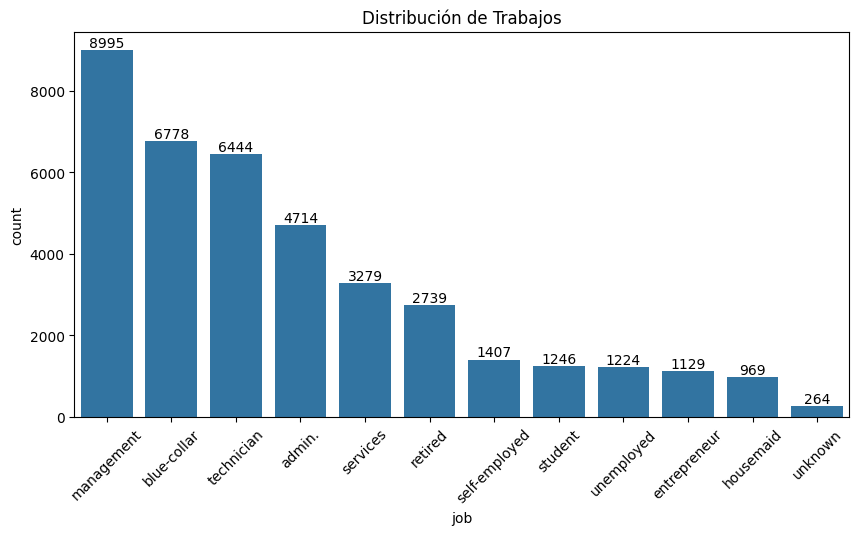

In [56]:
plt.figure(figsize=(10, 5))
num_job = sns.countplot(data=df_BANK_marketing, x='job', order=df_BANK_marketing['job'].value_counts().index)
for bar in num_job.containers: # número en las barras
    num_job.bar_label(bar)
plt.title('Distribución de Trabajos')
plt.xticks(rotation=45)
plt.show()

#### Variable marital

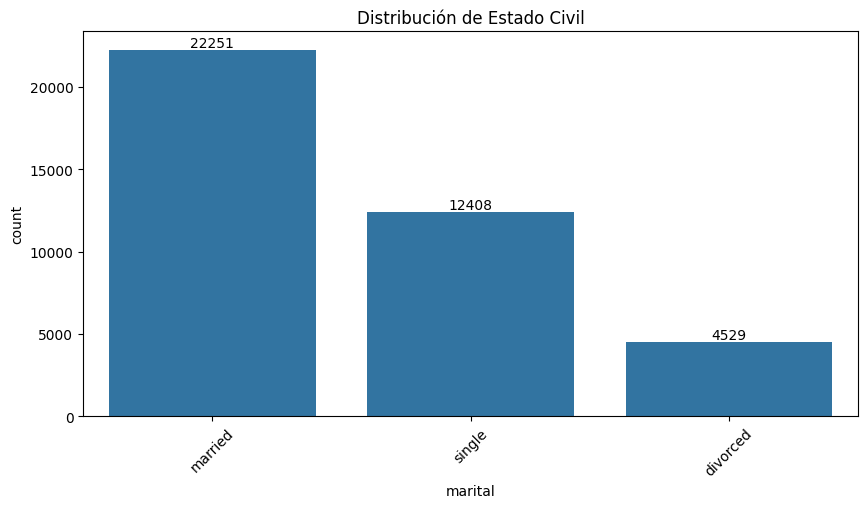

In [57]:
plt.figure(figsize=(10, 5))
num_marital = sns.countplot(data=df_BANK_marketing, x='marital', order=df_BANK_marketing['marital'].value_counts().index)
for bar in num_marital.containers: # número en las barras
    num_marital.bar_label(bar)
plt.title('Distribución de Estado Civil')
plt.xticks(rotation=45)
plt.show()

#### Variable education

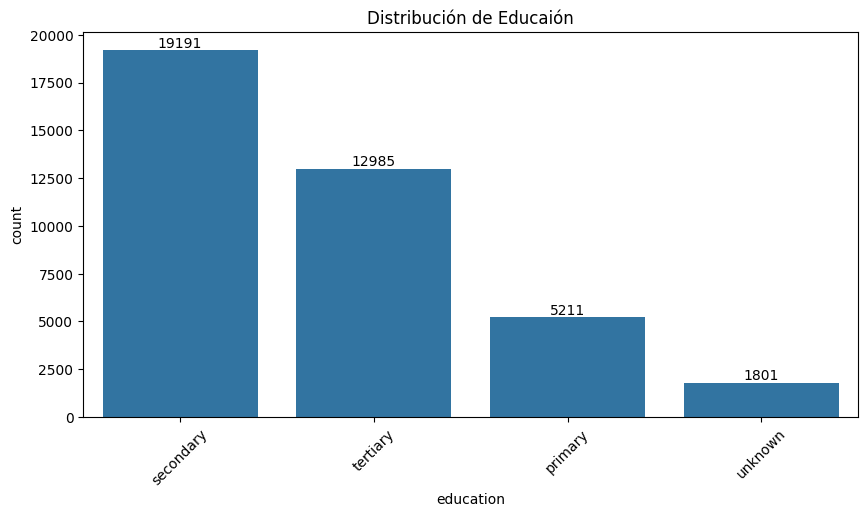

In [58]:
plt.figure(figsize=(10, 5))
num_education = sns.countplot(data=df_BANK_marketing, x='education', order=df_BANK_marketing['education'].value_counts().index)
for bar in num_education.containers: # número en las barras
    num_education.bar_label(bar)
plt.title('Distribución de Educaión')
plt.xticks(rotation=45)
plt.show()

#### Variable contact

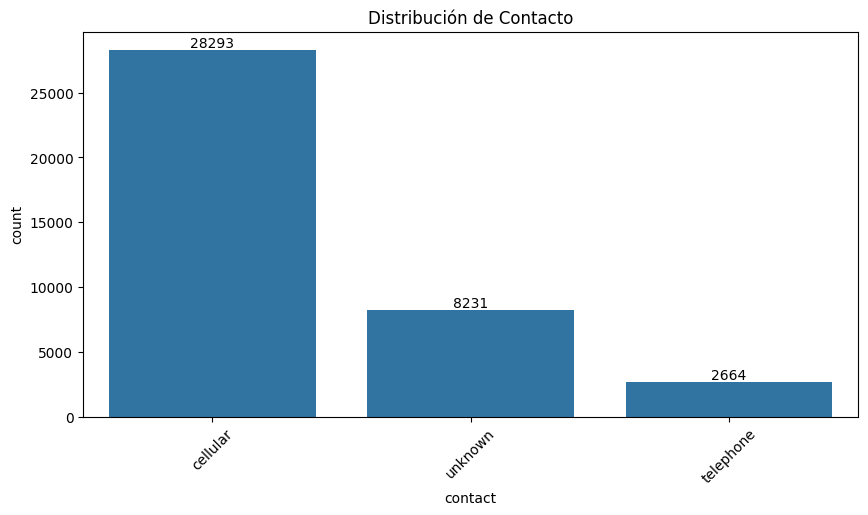

In [59]:
plt.figure(figsize=(10, 5))
num_contact = sns.countplot(data=df_BANK_marketing, x='contact', order=df_BANK_marketing['contact'].value_counts().index)
for bar in num_contact.containers: # número en las barras
    num_contact.bar_label(bar)
plt.title('Distribución de Contacto')
plt.xticks(rotation=45)
plt.show()

#### Variable month

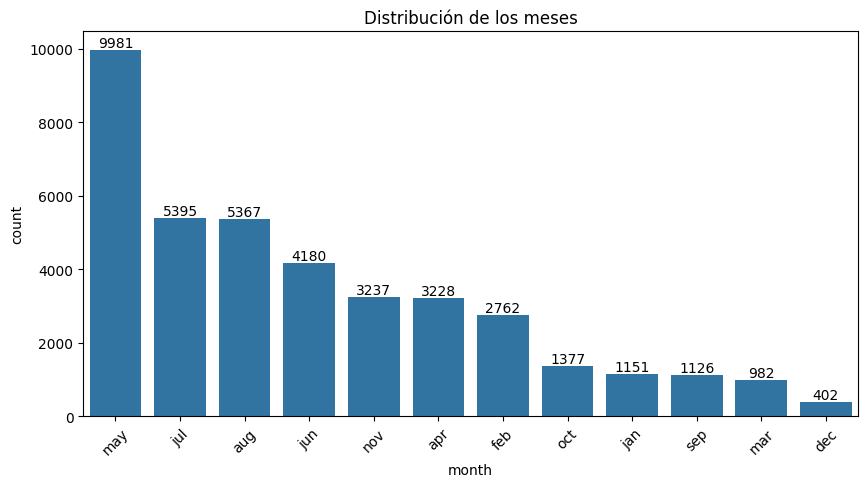

In [60]:
plt.figure(figsize=(10, 5))
num_month = sns.countplot(data=df_BANK_marketing, x='month', order=df_BANK_marketing['month'].value_counts().index)
for bar in num_month.containers: # número en las barras
    num_month.bar_label(bar)
plt.title('Distribución de los meses')
plt.xticks(rotation=45)
plt.show()

#### Variable poutcome

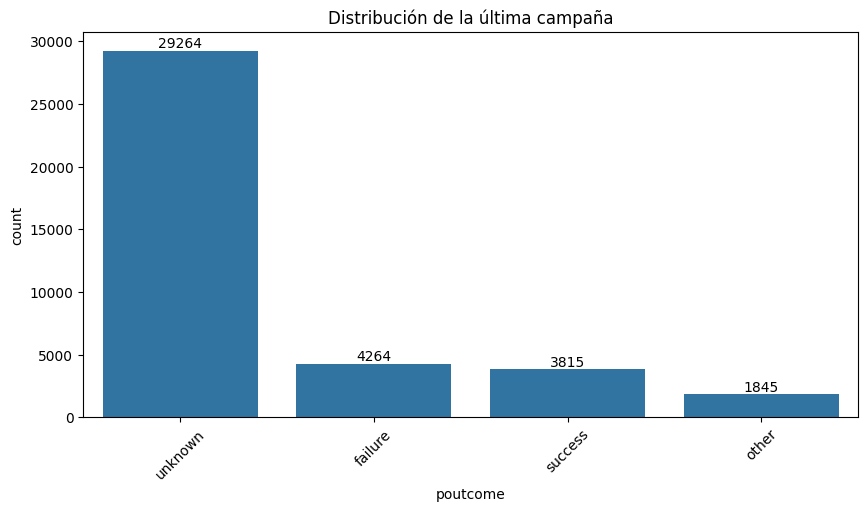

In [61]:
plt.figure(figsize=(10, 5))
num_poutcome = sns.countplot(data=df_BANK_marketing, x='poutcome', order=df_BANK_marketing['poutcome'].value_counts().index)
for bar in num_poutcome.containers: # número en las barras
    num_poutcome.bar_label(bar)
plt.title('Distribución de la última campaña')
plt.xticks(rotation=45)
plt.show()

### ANÁLISIS VARIABLES NUMÉRICAS

#### Variable balance

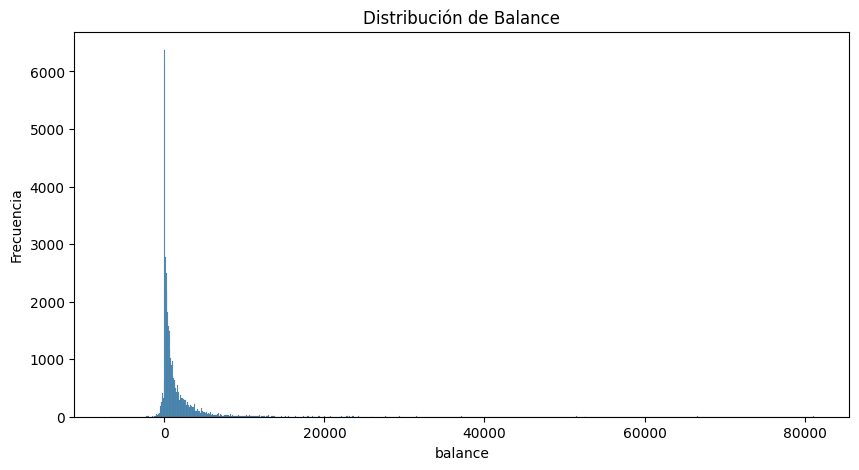

In [62]:
plt.figure(figsize=(10, 5))
sns.histplot(df_BANK_marketing['balance'])
plt.title('Distribución de Balance')
plt.xlabel('balance')
plt.ylabel('Frecuencia')
plt.show()

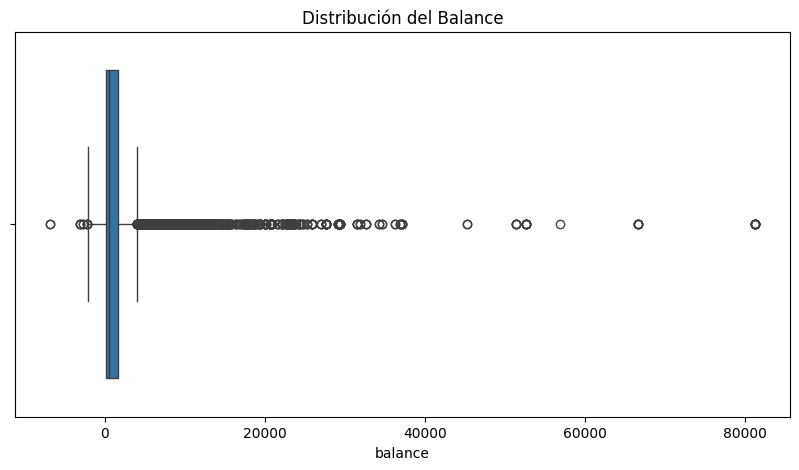

In [63]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_BANK_marketing, x='balance')
plt.title('Distribución del Balance')
plt.show()

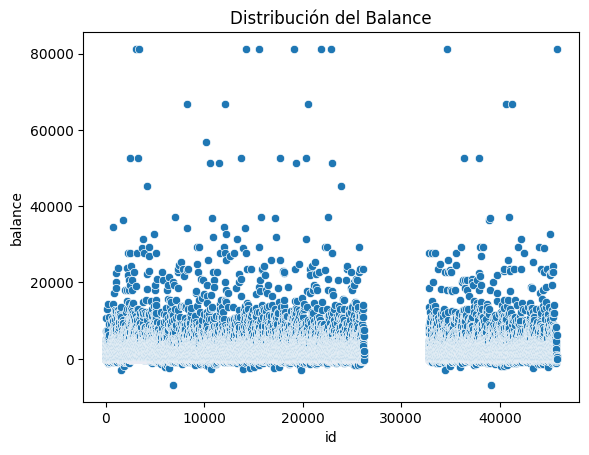

In [64]:
sns.scatterplot(x="id", y="balance", data=df_BANK_marketing)
plt.title("Distribución del Balance")
plt.show()

In [65]:
df_BANK_marketing['balance'].value_counts()

balance
 0        2748
 3         128
 1         121
 2         117
 5         106
          ... 
 14533       1
-325         1
 9317        1
 2476        1
-722         1
Name: count, Length: 3805, dtype: int64

#### Variable duration

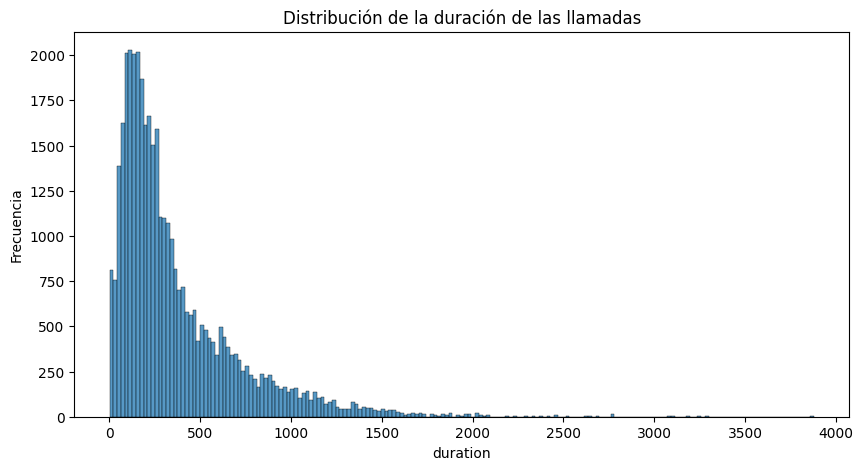

In [66]:
plt.figure(figsize=(10, 5))
sns.histplot(df_BANK_marketing['duration'])
plt.title('Distribución de la duración de las llamadas')
plt.xlabel('duration')
plt.ylabel('Frecuencia')
plt.show()

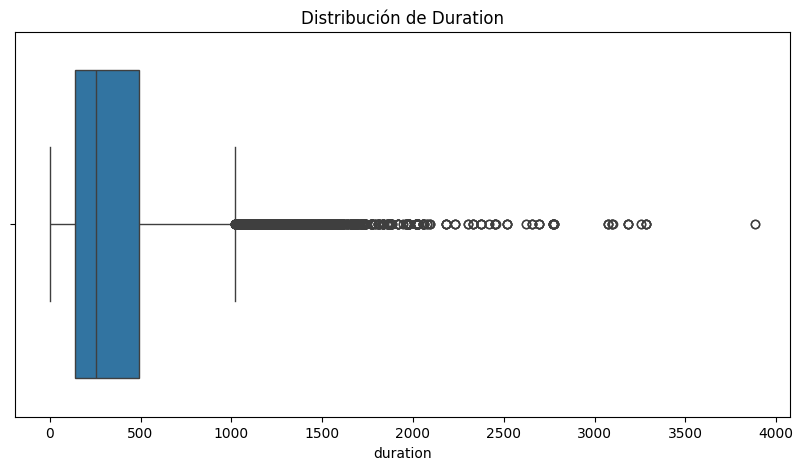

In [67]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_BANK_marketing, x='duration')
plt.title('Distribución de Duration')
plt.show()

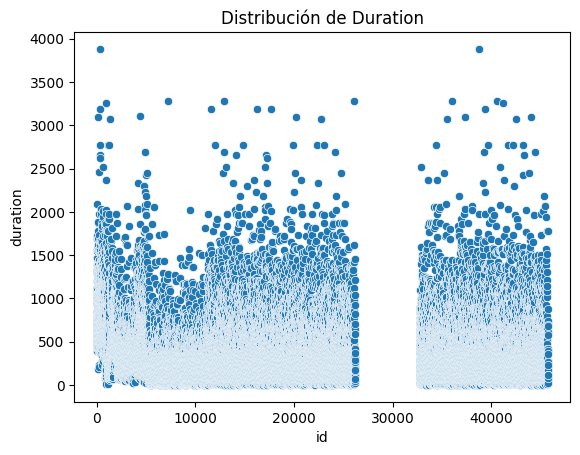

In [68]:
sns.scatterplot(x="id", y="duration", data=df_BANK_marketing)
plt.title("Distribución de Duration")
plt.show()

In [69]:
df_BANK_marketing['duration'].value_counts()

duration
119     146
97      145
101     139
136     134
173     129
       ... 
484       1
914       1
2087      1
818       1
1689      1
Name: count, Length: 1428, dtype: int64

#### Variable campaign

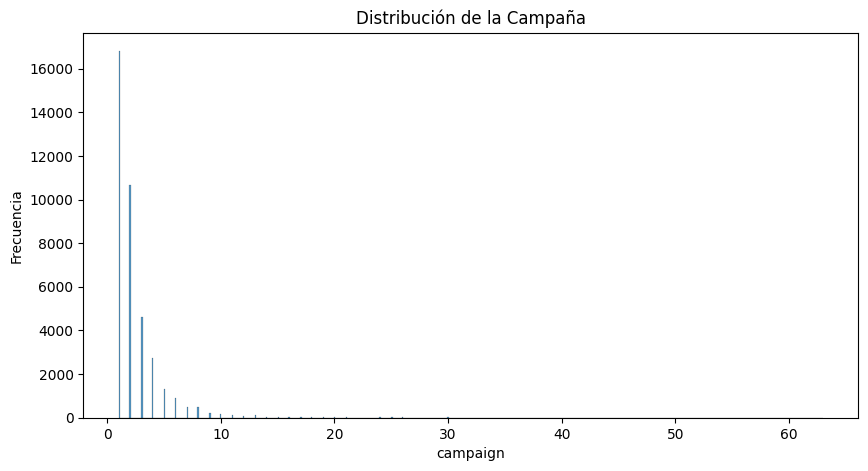

In [70]:
plt.figure(figsize=(10, 5))
sns.histplot(df_BANK_marketing['campaign'])
plt.title('Distribución de la Campaña')
plt.xlabel('campaign')
plt.ylabel('Frecuencia')
plt.show()

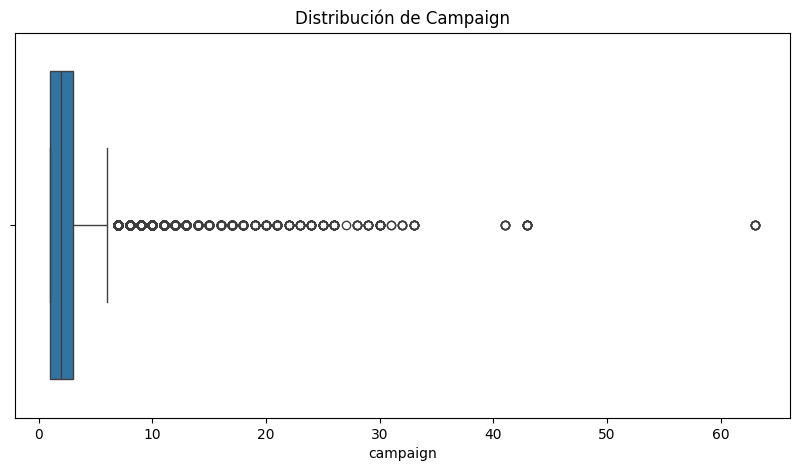

In [71]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_BANK_marketing, x='campaign')
plt.title('Distribución de Campaign')
plt.show()

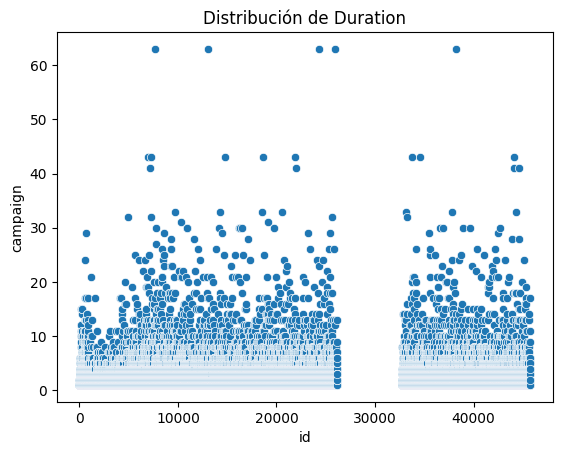

In [72]:
sns.scatterplot(x="id", y="campaign", data=df_BANK_marketing)
plt.title("Distribución de Duration")
plt.show()

In [73]:
df_BANK_marketing['campaign'].value_counts()

campaign
1     16808
2     10665
3      4636
4      2720
5      1326
6       913
7       495
8       493
9       229
10      182
11      122
13      115
12      101
14       52
17       47
15       42
16       35
18       31
21       29
20       19
24       15
19       14
30       14
26       12
25       11
22       10
23        9
43        8
29        7
33        7
28        5
63        5
41        4
32        4
31        2
27        1
Name: count, dtype: int64

#### Variable age

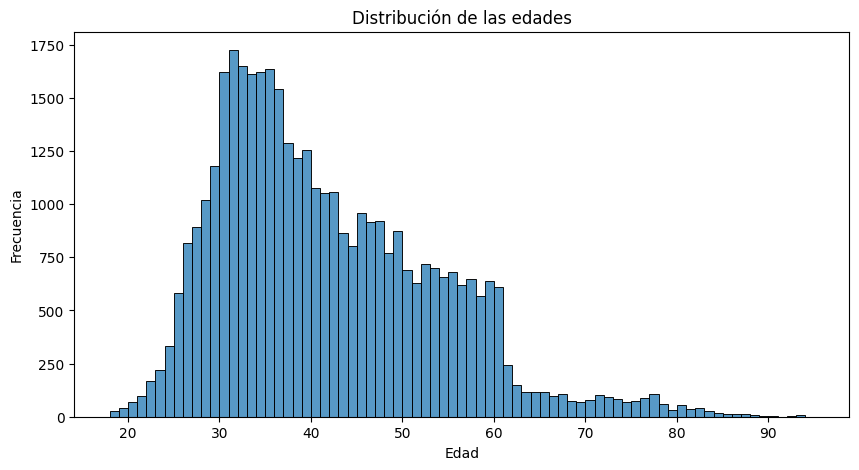

In [74]:
plt.figure(figsize=(10, 5))
sns.histplot(df_BANK_marketing['age'])
plt.title('Distribución de las edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

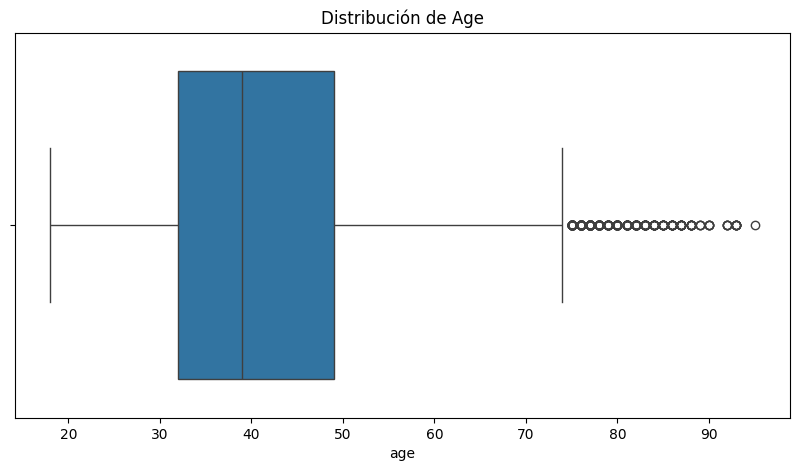

In [75]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_BANK_marketing, x='age')
plt.title('Distribución de Age')
plt.show()

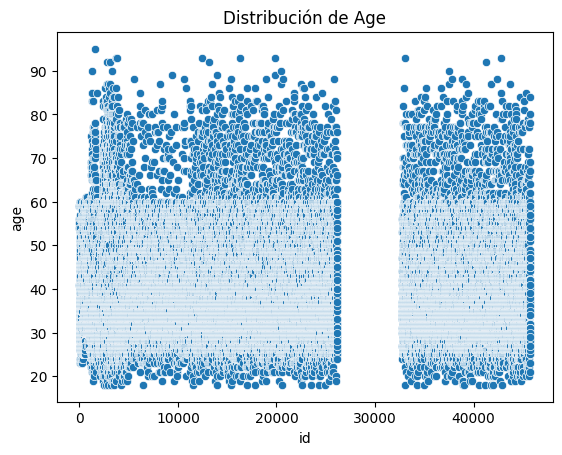

In [76]:
sns.scatterplot(x="id", y="age", data=df_BANK_marketing)
plt.title("Distribución de Age")
plt.show()

In [77]:
df_BANK_marketing['age'].value_counts()

age
31.0    1725
32.0    1648
35.0    1637
34.0    1622
30.0    1621
        ... 
93.0       7
90.0       4
92.0       4
89.0       3
95.0       1
Name: count, Length: 76, dtype: int64

#### Variable pdays

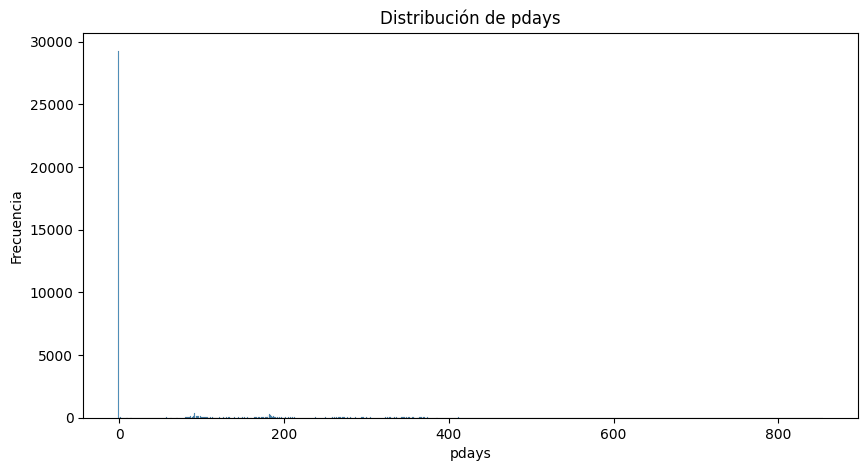

In [78]:
plt.figure(figsize=(10, 5))
sns.histplot(df_BANK_marketing['pdays'])
plt.title('Distribución de pdays')
plt.xlabel('pdays')
plt.ylabel('Frecuencia')
plt.show()

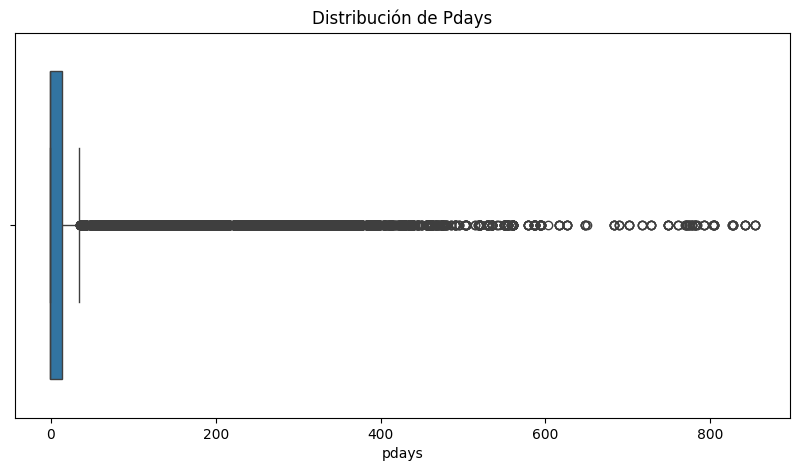

In [79]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_BANK_marketing, x='pdays')
plt.title('Distribución de Pdays')
plt.show()

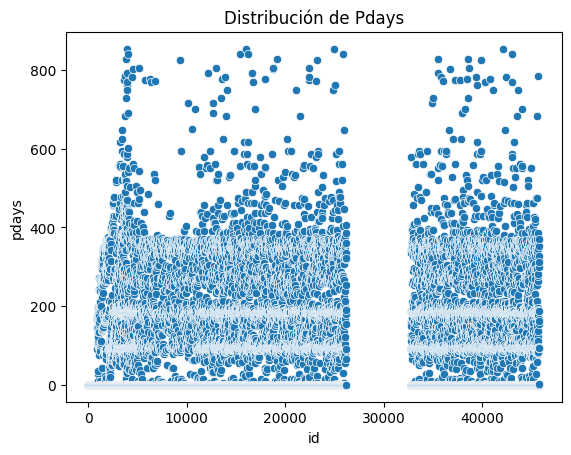

In [80]:
sns.scatterplot(x="id", y="pdays", data=df_BANK_marketing)
plt.title("Distribución de Pdays")
plt.show()

In [81]:
df_BANK_marketing['pdays'].value_counts()

pdays
-1      29258
 92       361
 182      302
 91       288
 183      270
        ...  
 158        1
 603        1
 420        1
 544        1
 651        1
Name: count, Length: 472, dtype: int64

#### Variable previous

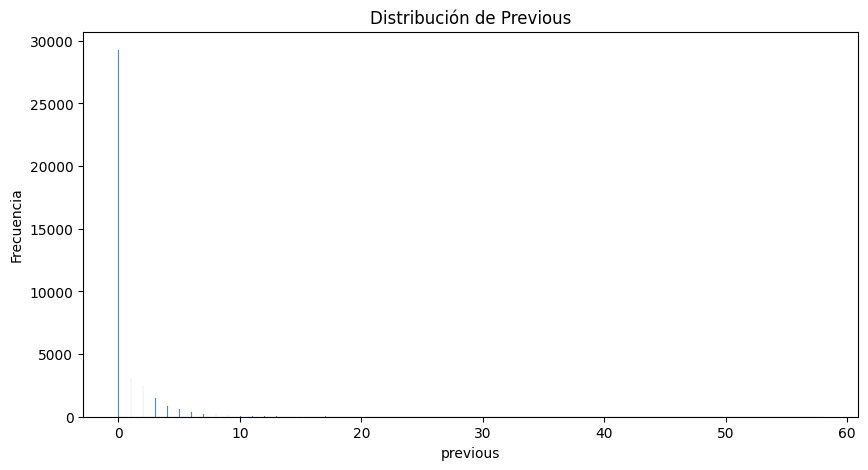

In [82]:
plt.figure(figsize=(10, 5))
sns.histplot(df_BANK_marketing['previous'])
plt.title('Distribución de Previous')
plt.xlabel('previous')
plt.ylabel('Frecuencia')
plt.show()

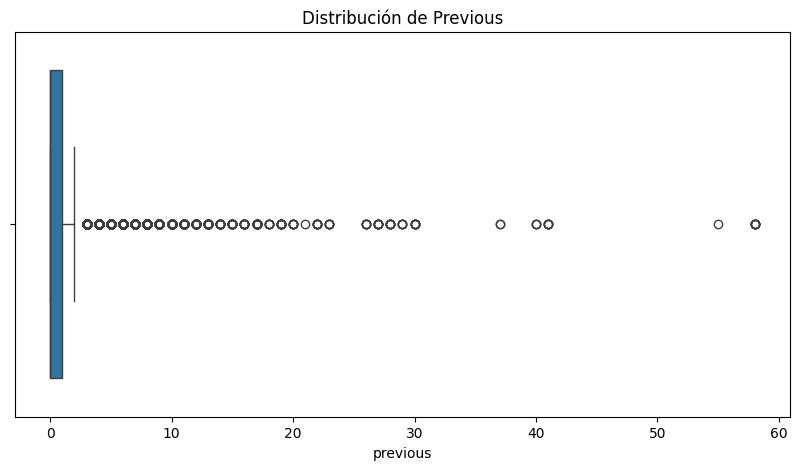

In [83]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_BANK_marketing, x='previous')
plt.title('Distribución de Previous')
plt.show()

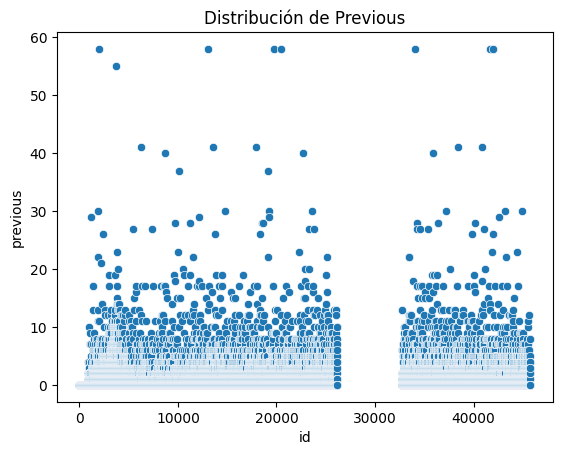

In [84]:
sns.scatterplot(x="id", y="previous", data=df_BANK_marketing)
plt.title("Distribución de Previous")
plt.show()

In [85]:
df_BANK_marketing['previous'].value_counts()

previous
0     29258
1      3093
2      2431
3      1532
4       838
5       624
6       415
7       247
8       209
9       110
10       93
11       67
12       59
13       40
17       39
15       20
14       15
19       13
16       12
27        8
30        7
22        7
28        7
58        7
20        6
41        5
26        5
18        5
23        5
29        4
40        3
37        2
55        1
21        1
Name: count, dtype: int64

### ANÁLISIS VARIABLES BOOLEANS

#### Variable is_in_default

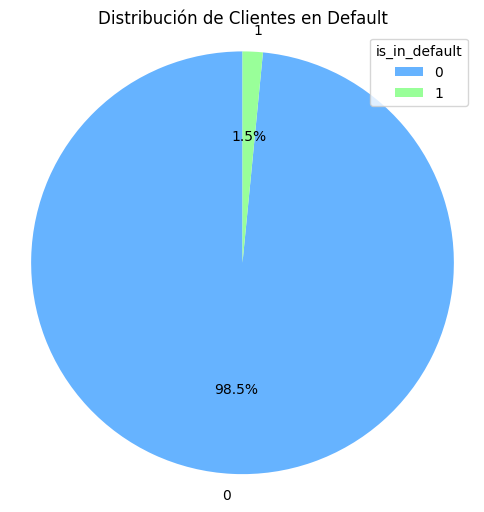

In [86]:
default_counts = df_BANK_marketing['is_in_default'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(default_counts, labels=default_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.title('Distribución de Clientes en Default')
plt.legend(default_counts.index, title="is_in_default", loc="best")
plt.axis('equal')  
plt.show()

#### Variable housing

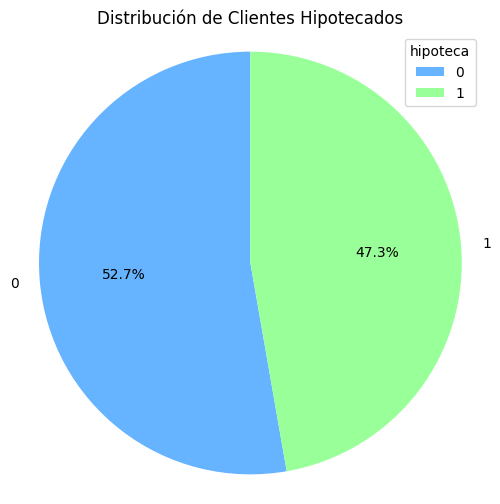

In [87]:
housing_counts = df_BANK_marketing['housing'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(housing_counts, labels=housing_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.title('Distribución de Clientes Hipotecados')
plt.legend(default_counts.index, title="hipoteca", loc="best")
plt.axis('equal')  
plt.show()

#### Variable loan

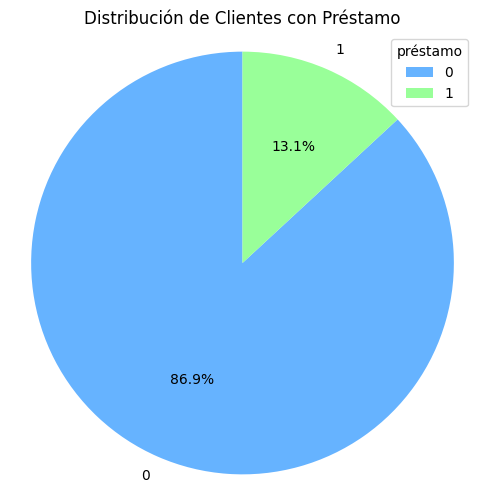

In [88]:
loan_counts = df_BANK_marketing['loan'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(loan_counts, labels=loan_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.title('Distribución de Clientes con Préstamo')
plt.legend(loan_counts.index, title="préstamo", loc="best")
plt.axis('equal')  
plt.show()